# Diabetes
Este conjunto de datos contiene diez variables base para 442 pacientes con diabetes:
- edad
- sexo
- índice de masa corporal
- presión arterial promedio 
- seis mediciones del suero sanguíneo
- respuesta de interés, una medida cuantitativa de la progresión de la enfermedad en un año.

Obtener el árbol de decisión óptimo para predecir la respuesta de interes a partir de los datos de los pacientes.

In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO

import pydotplus

In [2]:
df = 
df.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=1)
print(X_train)


          age       sex       bmi        bp        s1        s2        s3  \
332  0.030811 -0.044642  0.104809  0.076958 -0.011201 -0.011335 -0.058127   
307  0.067136  0.050680 -0.030996  0.004658  0.024574  0.035638 -0.028674   
328 -0.038207 -0.044642  0.067085 -0.060757 -0.029088 -0.023234 -0.010266   
275 -0.005515  0.050680 -0.011595  0.011544 -0.022208 -0.015406 -0.021311   
414  0.081666  0.050680  0.006728 -0.004523  0.109883  0.117056 -0.032356   
..        ...       ...       ...       ...       ...       ...       ...   
255  0.001751 -0.044642 -0.065486 -0.005671 -0.007073 -0.019476  0.041277   
72   0.063504  0.050680 -0.004050 -0.012556  0.103003  0.048790  0.056003   
396 -0.085430  0.050680 -0.030996 -0.022885 -0.063487 -0.054236  0.019187   
235  0.067136  0.050680 -0.014828  0.058596 -0.059359 -0.034508 -0.061809   
37  -0.009147 -0.044642  0.011039 -0.057314 -0.024960 -0.042963  0.030232   

           s4        s5        s6  
332  0.034309  0.057104  0.036201  
307

In [4]:
reg = DecisionTreeRegressor(max_depth=4)
# Valores de entrenamiento
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

## Valores de error y varianza

Comparamos los valores del EMC y la varianza comparando los conjuntos de prediccion y de prueba

- Si la variancia es cercana a 0.0 significa que no ha habido una prediccion, los conjuntos no están correlacionados. 
- Si la varianza es cercana a 1.0 significa que hay una prediccion perfecta.

In [5]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("Error medio cuadrado: ", mse)

r2 = metrics.r2_score(y_test, y_pred)
print("Puntaje de varianza: ", r2)

Error medio cuadrado:  4359.3187514576175
Puntaje de varianza:  0.13410557092362907


In [6]:
data_columns = df.data.columns

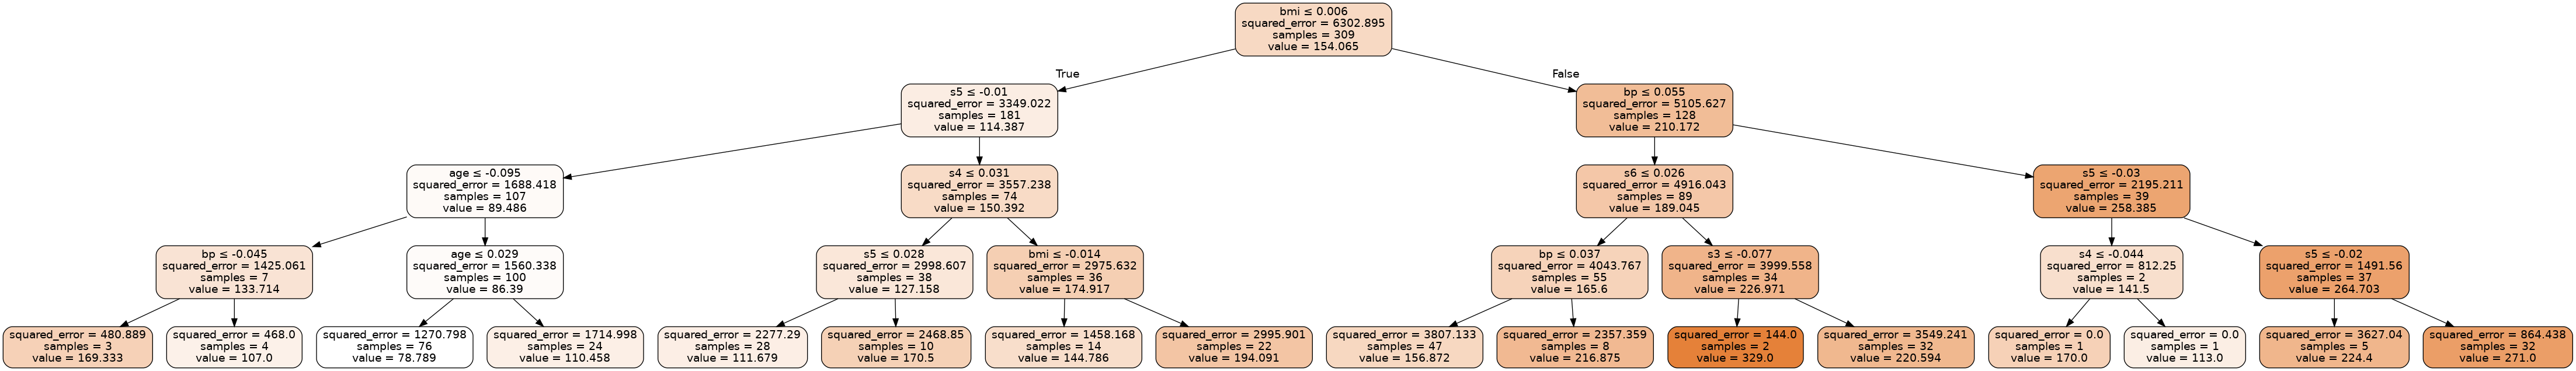

In [7]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- ¿Cuáles son los atributos más importantes que consideró el arbol de regresión según el EMC?

    Los atributos más importantes que se consideraron en el árbol de regresión, es decir, las variables que permiten que un paciente con diabetes tenga un mejor progreso, son:
    - Indice de masa corporal (bmi)
    - Edad (age)
    - Presión arterial promedio (bp)
    - Mediciones de suero sanguíneo (s)


- ¿En qué casos se tuvo un buen desempeño con respecto al avance de la enfermedad?
    
    Sabemos que la enfermedad no está tan avanzada cuando se dieron los siguientes datos: 
    - Indice de masa corporal <= 0.006
    - Nivel de triglicéridos en suero <= -0.01
    - Edad <= 0.029
    - Valor: 78.789

- ¿En qué casos se tuvo un buen desempeño con respecto al avance de la enfermedad?
    
    Sabemos que la enfermedad está avanzada cuando se dieron los siguientes datos: 
    - Indice de masa corporal > 0.006
    - Presión arterial promedio <= 0.055
    - Nivel de azúcar en sangre > 0.026
    - Lipoproteínas de alta densidad <= -0.077
    - Valor: 329.0
    
- ¿Cumple con su función este arbol de decisión?

    Con este árbol no podemos realizar predicciones sobre valores reales, ya que el modelo de entrenamiento está basado en valores relativos y no en valores idóneos.
    
    Sólo podemos plantear cuáles son los atributos que influyen mayormente en la diabetes en las personas.